In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parents[0]))
from src.data_loader.load_data import load_portfolio_data
from src.tests.ab_tests import preprocess_data, prepare_ab_groups,check_categorical_balance, check_numeric_balance, calculate_claim_frequency, calculate_claim_severity, test_claim_frequency, test_claim_severity, plot_metric_by_group

In [3]:
# Load data
df = load_portfolio_data("../data/MachineLearningRating_v3.txt")
df = preprocess_data(df)

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\data_loader\load_data.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="|", parse_dates=['TransactionMonth'])


### Hypothesis 2: Risk Differences between Women and Men
H₀: There are no risk differences between Women and Men

In [4]:
# --- Select Two Zip Codes to Compare ---
group_a = "Female"
group_b = "Male"
# --- Prepare A/B Data (Feature: ZipCode) ---
df_ab = prepare_ab_groups(df, group_a, group_b, feature_col="Gender")

In [5]:
# --- Metric Calculations ---
freq_a = calculate_claim_frequency(df_ab[df_ab["Group"] == "A"])
freq_b = calculate_claim_frequency(df_ab[df_ab["Group"] == "B"])
sev_a = calculate_claim_severity(df_ab[df_ab["Group"] == "A"])
sev_b = calculate_claim_severity(df_ab[df_ab["Group"] == "B"])

print(f"\nClaim Frequency:\n  {group_a}: {freq_a:.4f} | {group_b}: {freq_b:.4f}")
print(f"Claim Severity:\n  {group_a}: {sev_a:.2f} | {group_b}: {sev_b:.2f}")


Claim Frequency:
  Female: 0.0021 | Male: 0.0022
Claim Severity:
  Female: 17874.72 | Male: 14858.55


In [6]:
# --- Hypothesis Tests ---
p_freq = test_claim_frequency(df_ab)
p_sev = test_claim_severity(df_ab)

print(f"\n Claim Frequency Test p-value: {p_freq:.4f} — {'❌ Fail to Reject' if p_freq > 0.05 else '✅ Reject Null'}")
print(f" Claim Severity Test p-value: {p_sev:.4f} — {'❌ Fail to Reject' if p_sev > 0.05 else '✅ Reject Null'}")



 Claim Frequency Test p-value: 0.9515 — ❌ Fail to Reject
 Claim Severity Test p-value: 0.5680 — ❌ Fail to Reject


C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\tests\ab_tests.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  values = df_ab.groupby("Group").apply(metric_func).reset_index(name="value")


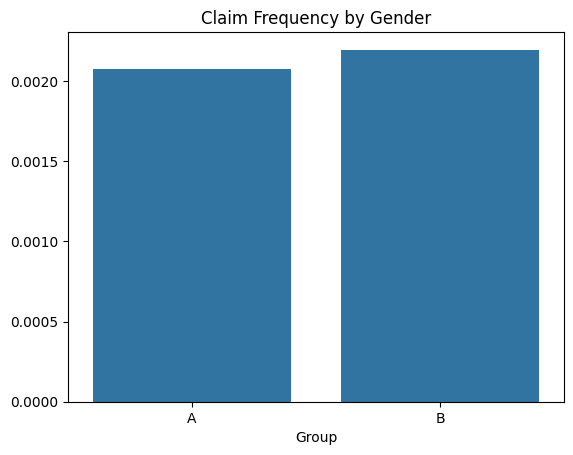

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\tests\ab_tests.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  values = df_ab.groupby("Group").apply(metric_func).reset_index(name="value")


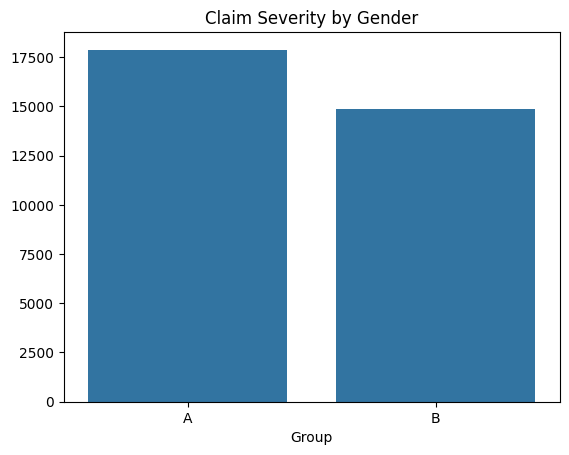

In [7]:
# --- Visualizations ---
plot_metric_by_group(df_ab, calculate_claim_frequency, "Claim Frequency by Gender")
plot_metric_by_group(df_ab, calculate_claim_severity, "Claim Severity by Gender")

We fail to reject the null hypothesis for gender (p = 0.9515 for frequency, p = 0.5680 for severity). Specifically, women and men exhibit statistically similar claim frequencies and severities.

This indicates that gender does not have a significant effect on claim behavior in this portfolio. As a result, risk-based premium adjustments based on gender are not supported by the data, and no gender-based underwriting differentiation is currently warranted.